<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/767_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [2]:
df = pd.read_csv("./Assignment_3_Hitters.csv")
df.rename( columns={'Unnamed: 0':'hitter_name'}, inplace=True )

df = df.select_dtypes(include=np.number)
df.reset_index(drop=True)
X_train = df.loc[~df.isnull().any(axis=1), df.columns != 'Salary']
y_train = df.loc[~df.isnull().any(axis=1), ['Salary']]
X_test = df.loc[df.isnull().any(axis=1), df.columns != 'Salary']


In [32]:
def predict(row, weights, bias):
  output = bias
  for index, weight in enumerate(weights):
    output += weight * row[index]
  return output if output > 0.0 else 0.0 

def train_weights_using_batch_gradient_descent(X_train, y_train, num_epochs, learning_rate, lambda_val, alpha_val=0.9, batch_size=12):
  # weights for all the features 
  weights = [random.uniform(-2,2)* math.sqrt(1/16) for i in range(16)]
  bias = 0
  index = 0
  plot_values = []
  while index < num_epochs:
    mse = 0.0
    total_weights = 0.0
    total_gradient = [0 for _ in range(16)]
    mini_batch = X_train.sample(n = batch_size, random_state=42)
    total_weights = sum([weight**2 for weight in weights])
    for rowIndex, row in mini_batch.iterrows():
      predicted_value = predict(row, weights, bias)
      error = (y_train.loc[rowIndex,'Salary'] - predicted_value)
      error_with_regularization = error + total_weights
      mse += error**2
      mse_with_regularization = mse + total_weights
      total_gradient = [gradient + (error_with_regularization * row[gradient_index]) for gradient_index, gradient in enumerate(total_gradient)] 
    total_gradient = [(alpha_val * gradient) + gradient for gradient in total_gradient] 
    bias = bias + learning_rate * (mse_with_regularization/mini_batch.shape[0])
    weights = [weight + learning_rate * (total_gradient[weight_index]/mini_batch.shape[0]) for weight_index, weight in enumerate(weights)]
    index = index + 1
    plot_values.append((index, mse_with_regularization))
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (index, learning_rate, mse_with_regularization/mini_batch.shape[0]))
  df_plot_values = pd.DataFrame(plot_values, columns=['epoch', 'MSE'])
  return weights, bias, df_plot_values

In [33]:
(weights, bias, df_plot_values) = train_weights_using_batch_gradient_descent(X_train, y_train, 2000, 0.00000001, 10, 5)

>epoch=1, lrate=0.000, error=374940.141
>epoch=2, lrate=0.000, error=81324.942
>epoch=3, lrate=0.000, error=63352.853
>epoch=4, lrate=0.000, error=61718.705
>epoch=5, lrate=0.000, error=61243.485
>epoch=6, lrate=0.000, error=60811.176
>epoch=7, lrate=0.000, error=60398.534
>epoch=8, lrate=0.000, error=59992.689
>epoch=9, lrate=0.000, error=59595.467
>epoch=10, lrate=0.000, error=59206.122
>epoch=11, lrate=0.000, error=58824.613
>epoch=12, lrate=0.000, error=58450.734
>epoch=13, lrate=0.000, error=58084.324
>epoch=14, lrate=0.000, error=57725.216
>epoch=15, lrate=0.000, error=57373.250
>epoch=16, lrate=0.000, error=57028.267
>epoch=17, lrate=0.000, error=56690.115
>epoch=18, lrate=0.000, error=56358.642
>epoch=19, lrate=0.000, error=56033.701
>epoch=20, lrate=0.000, error=55715.148
>epoch=21, lrate=0.000, error=55402.842
>epoch=22, lrate=0.000, error=55096.646
>epoch=23, lrate=0.000, error=54796.424
>epoch=24, lrate=0.000, error=54502.045
>epoch=25, lrate=0.000, error=54213.381
>epoch=2

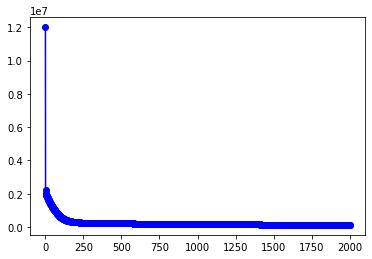

In [30]:
plt.plot(df_plot_values['epoch'], df_plot_values['MSE'], marker='o', color='blue')